# Visualize data processing flow

Using mermaid, we can generate a directed graph that illustrates the data processing steps implemented in the DataHub subclass, along with their dependencies.

This visual representation enhances the understanding of the data flow, making it easier to identify the sequence of operations and their hierarchical relationships within the data processing pipeline.

This Notebook uses mermaid-cli internally. 
- [mermaid documentation](https://mermaid.js.org/)
- [mermaid github](https://github.com/mermaid-js/mermaid)

In [1]:
import os

import polars as pl
import numpy as np
import pathlib
from sklearn.datasets import fetch_openml
import inspect
import subprocess
import tempfile

from pytred import DataHub, DataNode
from pytred.decorators import polars_table
from pytred.helpers.visualize import make_dataflow_graph_from_datahub, report_datahub


## Sample DataHub

This `SampleDataHub` class is designed solely for the purpose of illustrating graph visualization.   
Although the methods within are not implemented to perform actual data processing, they are structured to demonstrate how data flow can be visualized using mermaid. 

In [2]:
class SampleDataHub(DataHub):
    """
    This is sample datahub.
    Descriptions of this dataflow is included in report.
    """

    @polars_table(0, None, join=None)
    def table1_1(self, input_table):
        """description of table1_1"""
        ...

    @polars_table(0, None, join=None)
    def table1_2(self, input_table):
        """description of table1_2"""
        ...

    @polars_table(0, None, join=None)
    def table1_3(self):
        """description of table1_3"""
        ...

    @polars_table(0, None, join=None)
    def table1_4(self):
        """description of table1_4"""
        ...

    @polars_table(0, "key", join="left")
    def table1_5(self):
        """
        multi lines description of table1_5
        multi lines description of table1_5
        """
        ...

    @polars_table(1, "key", join="inner")
    def table2_1(self, input_table, table1_1):
        """description of table2_1"""
        ...

    @polars_table(1, None, join=None)
    def table2_2(self, table1_1, table1_2):
        """description of table2_2"""
        ...

    @polars_table(1, None, join=None)
    def table2_3(self, input_table, table1_3):
        """description of table2_3"""
        ...

    @polars_table(1, None, join=None)
    def table2_4(self, table1_3):
        """description of table2_4"""
        ...

    @polars_table(2, "key", join="inner")
    def table3(self, table1_4, table2_3, table2_4):
        """description of table3"""
        ...

    @polars_table(3, "key", join="left")
    def table4(self, input_table, table3):
        """description of table4"""
        ...

## Plot dataflow image

Generating single mermaid chart


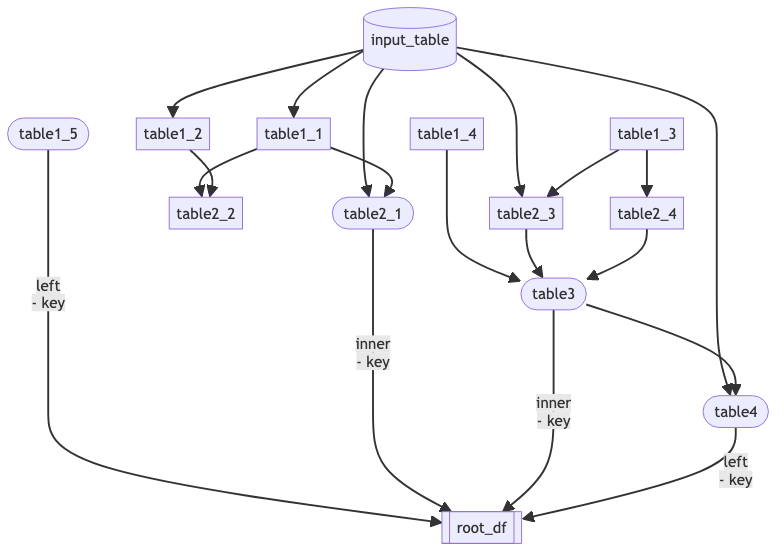

In [3]:
sample_datahub = SampleDataHub(root_df=pl.DataFrame(), input_table=pl.DataFrame())

make_dataflow_graph_from_datahub(sample_datahub, output="temp.png")

from IPython.display import Image
Image("temp.png")


In [4]:
os.remove("temp.png")

## Make Report of datahub
Make report of datahub with markdown format.
This report has contents below.
1. docstrings of datahub class
2. image of dataflow
3. tables about each tables in datahub

In [5]:
print(report_datahub(sample_datahub))

## SampleDataHub
This is sample datahub.  
Descriptions of this dataflow is included in report.

### SampleDataHub detail
| order | name | table type | join | keys | descriotion |
| :-: | :-: | :-: | :-: | :-: | :-: |
| -1 | input_table | input |  |  |  |
| 0 | table1_1 | function |  |  | description of table1_1 |
| 0 | table1_2 | function |  |  | description of table1_2 |
| 0 | table1_3 | function |  |  | description of table1_3 |
| 0 | table1_4 | function |  |  | description of table1_4 |
| 0 | table1_5 | function | left | key | multi lines description of table1_5<br>multi lines description of table1_5 |
| 1 | table2_1 | function | inner | key | description of table2_1 |
| 1 | table2_2 | function |  |  | description of table2_2 |
| 1 | table2_3 | function |  |  | description of table2_3 |
| 1 | table2_4 | function |  |  | description of table2_4 |
| 2 | table3 | function | inner | key | description of table3 |
| 3 | table4 | function | left | key | description of table4 |


### Dataf